In [54]:
!git clone https://github.com/lmcanavals/algorithmic_complexity.git


fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [55]:
from algorithmic_complexity.aclib import graphstuff as gs

In [56]:
import pandas as pd
import numpy as np
import networkx as nx
import math
import heapq as hq

In [57]:
url="https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/poblaciones.csv"
poblacionesDF = pd.read_csv(url)

In [58]:
print(len(poblacionesDF))
poblacionesDF.head()

3757


,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
0,AMAZONAS,BAGUA,ARAMANGO,EL MUYO (C.P.L.),-5.422545,-78.45299,311,1206
1,AMAZONAS,BAGUA,ARAMANGO,RESERVA UJUCANO,-5.427565,-78.444372,44,129
2,AMAZONAS,BAGUA,ARAMANGO,TUTUMBEROS,-5.327317,-78.44472,49,179
3,AMAZONAS,BAGUA,BAGUA,ALENYA BAJO,-5.682439,-78.495229,3,8
4,AMAZONAS,BONGARA,CUISPES,MITOPAMPA,-5.93856,-77.965302,1,4


In [59]:
nomprovincias = poblacionesDF['PROVINCIA'].unique()


In [60]:
nomdistritos = provincias[nom_provincia]['DISTRITO'].unique()

In [61]:

no_type_checking = ''
nom_provincia = 'CASMA' #@param {type:"string"}
pro = provincias[nom_provincia]


In [62]:
def dist(cp1, cp2):
  x1, y1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
  x2, y2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])

  return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

In [63]:
G = nx.Graph()
col = 'CENTRO POBLADO'

for i, cp1 in pro.iterrows():
  for j, cp2 in pro.iterrows():
    if cp1[col] != cp2[col]:
      G.add_edge(cp1[col], cp2[col], weight=dist(cp1, cp2))

In [64]:
def PRIM(G, nombre):
    for u in G.nodes:
      G.nodes[u]['visited']= False
      G.nodes[u]['path'] = ' '
      G.nodes[u]['cost'] = -1.0

    G.nodes[nombre]['cost'] = 0.0
    cola = [(0,nombre)]
    
    menor = 0
    while cola:
      _, n = hq.heappop(cola)
      if not G.nodes[n]['visited']:

        G.nodes[n]['visited'] = True

      for v in G.neighbors(n):

        if not G.nodes[v]['visited']:
          costo = G.edges[n, v]['weight']

          if G.nodes[v]['cost'] != -1 and costo < G.nodes[v]['cost']:
            G.nodes[v]['cost'] = costo      
            G.nodes[v]['path'] = n   
            hq.heappush(cola,(costo,v))  

          elif G.nodes[v]['cost'] == -1:
            G.nodes[v]['cost'] = costo 
            G.nodes[v]['path'] = n
            hq.heappush(cola,(costo,v))      
      
            
              
    P = nx.Graph()      
    path = [0]*G.number_of_nodes()
    prueba =[()]
    for v, info in G.nodes.data():
      hq.heappush(prueba,(v,info['visited'], info['cost'], info['path']))
      P.add_edge(v,info['path'], weight = info['cost'])

    return P

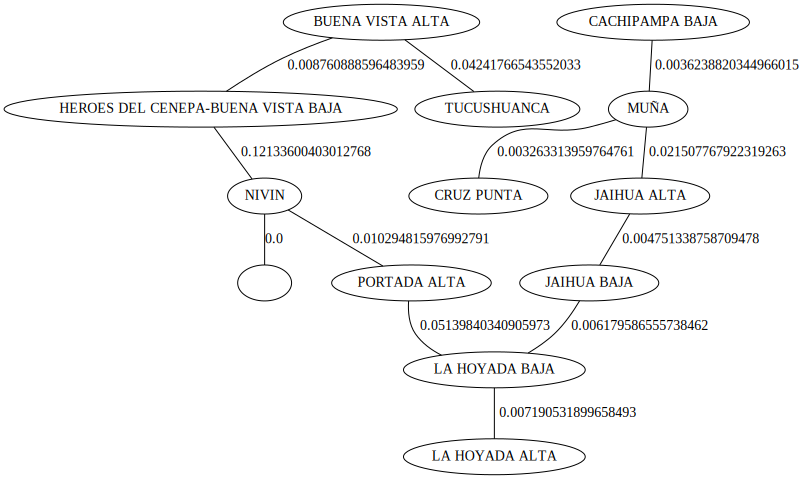

In [65]:
no_type_checking = ''
cpi = 'NIVIN' #@param {type:"string"}

gs.nx2gv(PRIM(G,cpi), weighted=True, params={'size':'30'})